<a href="https://colab.research.google.com/github/ha-az/MobAppDev2/blob/master/0_1_classifier_perceptron_vrai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten 
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import cv2
import os
import numpy as np

In [7]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
img_size = 20
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)#[...,::-1] #convert BGR to RGB format
                data.append([img_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
  

In [8]:
train = get_data('/content/drive/MyDrive/new_image_train_TEST')
val = get_data('/content/drive/MyDrive/new_image_Val_TEST')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


# Nouvelle section

Text(0.5, 1.0, '3')

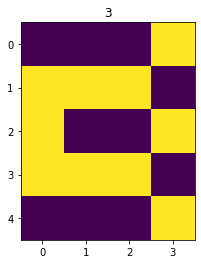

In [ ]:
#plt.figure(figsize = (5,4))
plt.imshow(train[15][0])
plt.title(labels[train[15][1]])

Text(0.5, 1.0, '2')

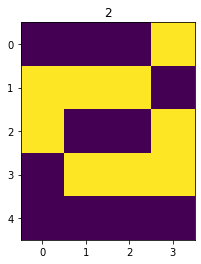

In [ ]:
plt.figure(figsize = (5,4))
plt.imshow(train[9][0])
plt.title(labels[train[9][1]])
#print(train)

In [9]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

y_train = np.array(y_train)

y_val = np.array(y_val)
x_train.shape


(40, 5, 4)

In [10]:
from keras.constraints import maxnorm, nonneg
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(5,4)))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(10, activation='softmax', use_bias=False) )
#model.add(tf.keras.layers.Dense(10, activation='softmax',use_bias=False, kernel_constraint = nonneg()))
model.add(tf.keras.layers.Dense(10, activation='softmax',use_bias=False))
#Keras.layers.Dense ==> 10=outputs
model.summary()
kernel_constraint = nonneg?

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 10)                200       
                                                                 
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


In [11]:
#opt = Adam(lr=0.000001)
#check impact on weights
opt='adam'
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [12]:
history = model.fit(x_train,y_train,epochs = 1000 , validation_data = (x_val, y_val))


Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 1s 204ms/step - loss: 2.6073 - accuracy: 0.1000 - val_loss: 2.5918 - val_accuracy: 0.1000
Epoch 2/1000
2/2 [==============================] - 0s 24ms/step - loss: 2.5905 - accuracy: 0.1000 - val_loss: 2.5762 - val_accuracy: 0.1000
Epoch 3/1000
2/2 [==============================] - 0s 26ms/step - loss: 2.5743 - accuracy: 0.1000 - val_loss: 2.5604 - val_accuracy: 0.1000
Epoch 4/1000
2/2 [==============================] - 0s 28ms/step - loss: 2.5591 - accuracy: 0.1000 - val_loss: 2.5448 - val_accuracy: 0.1000
Epoch 5/1000
2/2 [==============================] - 0s 24ms/step - loss: 2.5432 - accuracy: 0.1000 - val_loss: 2.5297 - val_accuracy: 0.1000
Epoch 6/1000
2/2 [==============================] - 0s 26ms/step - loss: 2.5275 - accuracy: 0.1000 - val_loss: 2.5144 - val_accuracy: 0.1000
Epoch 7/1000
2/2 [==============================] - 0s 24ms/step - loss: 2.5125 - accuracy: 0.1000 - val_loss: 2.4988 - val_accuracy: 0.1000
Epoch 8/1000
2/2 [=======

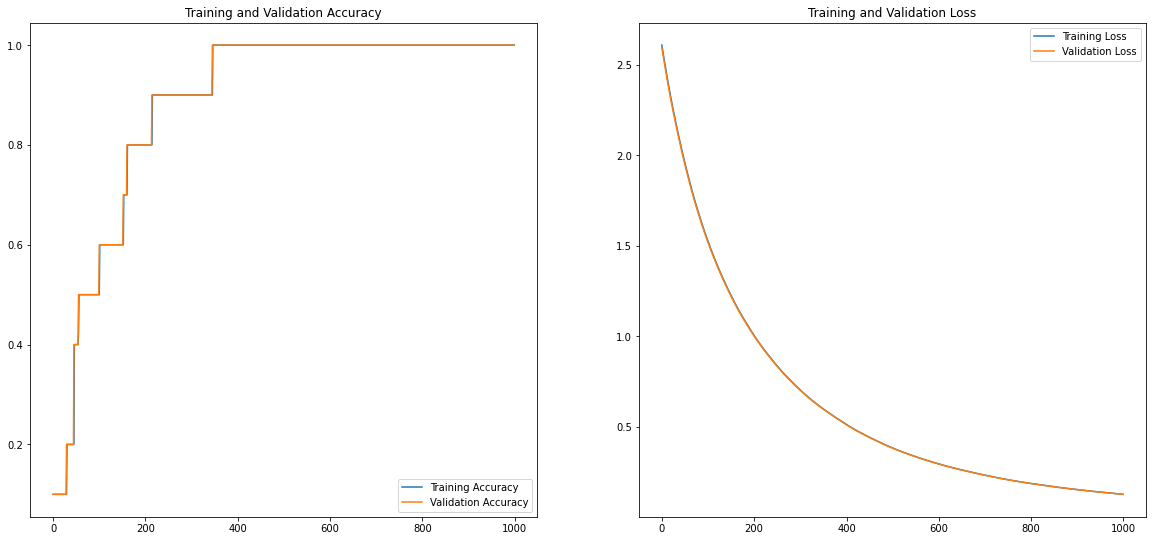

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1000)

plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

[[0.00379896 0.00163436 0.00152894 0.01072439 0.0020823  0.8077673
  0.07022522 0.00375316 0.00551032 0.09297504]]


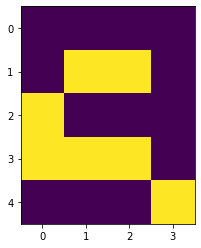

In [23]:
pred = model.predict(x_val)

pred.shape
#print(pred)
pred9=x_val[5].reshape((1,5,4))
res9=model.predict(pred9)
print(res9)
plt.imshow(train[39][0])
#plt.imshow(train[9][0])

In [15]:
print(model.weights)


[<tf.Variable 'dense/kernel:0' shape=(20, 10) dtype=float32, numpy=
array([[ 0.4135053 , -0.07524938, -0.6951929 , -1.3552886 , -0.28755778,
        -0.9226517 ,  1.019991  , -1.0142667 ,  0.518511  , -0.4675711 ],
       [-0.630068  ,  0.17740421, -0.1482873 , -0.6714963 ,  0.22674249,
        -0.83613575, -0.6918258 , -0.9196592 , -0.6437805 , -0.01734369],
       [-0.5558118 ,  0.41851565, -0.2498978 , -0.88471353, -0.28453842,
        -0.29763398, -0.9353552 , -0.68582505, -0.1494272 , -0.46410477],
       [ 0.41770247, -0.42221352,  0.8790365 ,  1.1904705 ,  0.54197776,
        -1.0845028 , -1.7082515 , -1.2321122 ,  0.33398536, -1.291345  ],
       [-0.599796  ,  0.523851  ,  0.7344921 ,  0.4529271 , -0.01739033,
        -0.48002413, -0.9205757 ,  0.33637467, -0.65494776, -0.5713144 ],
       [-0.09915403,  0.30510017, -0.11598229, -0.32175192, -0.592942  ,
         0.01865093,  0.45593852, -0.12222435,  0.08284719, -0.20111385],
       [ 0.17454432, -1.256733  , -0.05859756, -0.

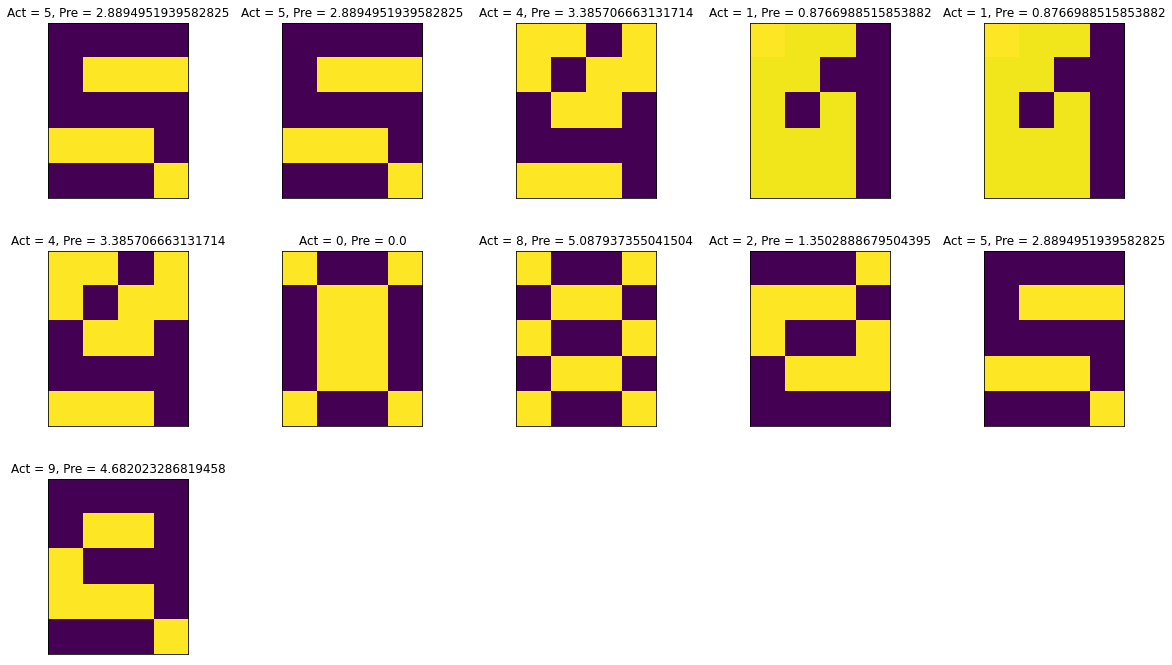

In [ ]:
plt.figure(1 , figsize = (20 , 20))
n = 0

for i in range(11):
    n += 1 
    r = np.random.randint( 0, x_val.shape[0], 1)
    
    plt.subplot(5, 5, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_val[r[0]])
    plt.title('Act = {}, Pre = {}'.format(y_val[r[0]] , y_val[r[0]]*pred[r[0]][y_val[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()